In [1]:
import os

import cfGPR

import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
exposures = np.arange(450, 455)

172.7982011141565 0
172.3069353433441 0
173.23585567784224 0
175.98982304633725 0
172.86375202406376 0
159.8226895312818 0
147.42383993835733 0
160.9012809623934 0
151.62606521299352 0
148.6942267088655 0
149.92956067421937 0
143.81811512739534 0
132.56244757078113 0
133.16825051599676 0
144.50801714139513 0
144.3206622931356 0
207.7273139797282 0
146.0517141550714 0
172.45204468628023 0
140.30330049675374 0
160.67991260345923 0
138.46822802323572 0
146.9298197518927 0
134.86028277465687 0
142.55400216186942 0
137.08157732575498 0
138.12768512562616 0
132.34155615171642 0
143.67134173213705 0
135.25784460258942 0
135.37213268638982 0
134.01990645945634 0
130.50555058696062 0
130.660172087561 0
129.80855487582602 0
130.47100828045964 0
132.18330356237152 0
130.64330218439068 0
128.5567865291492 0
129.3258195025639 0
134.932674306483 0
130.73736816932848 0
131.34868375843263 0
129.46632205884092 0
130.7383005242612 0
129.30887573213016 0
131.36661048443918 0
129.47367601293962 0
128.6874

/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

RMSx, RMSy, noise: 14.726964363091799 16.122519365824857 1.734564734039704


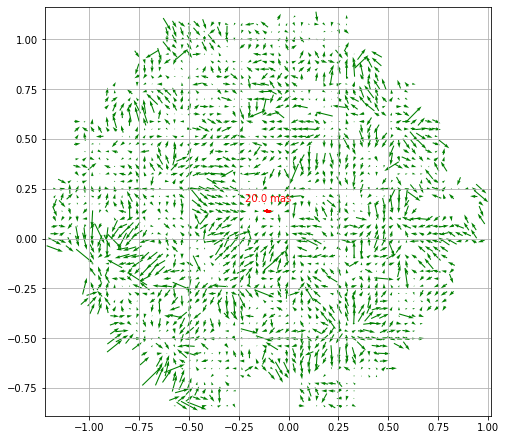

/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

RMSx, RMSy, noise: 10.710618438775644 9.426764322152378 1.734564734039704


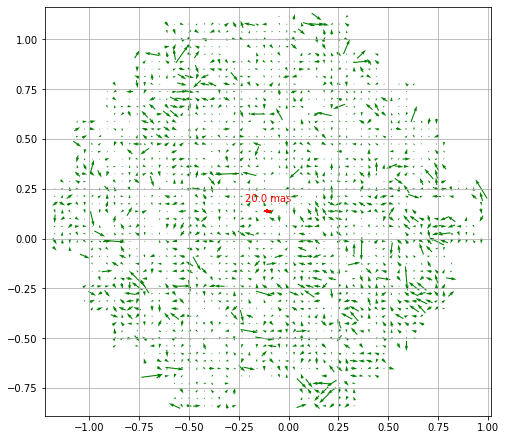

/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

RMSx, RMSy, noise: 14.095285968175011 14.707538934706172 0.750386197037176


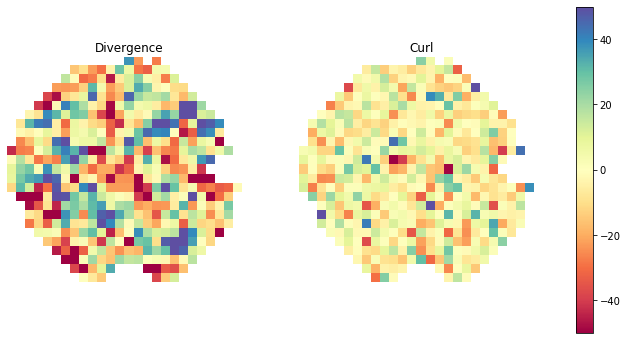

RMS of div: 30.53; curl: 14.98
RMSx, RMSy, noise: 10.228829659127996 7.3554218988922 0.750386197037176


/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

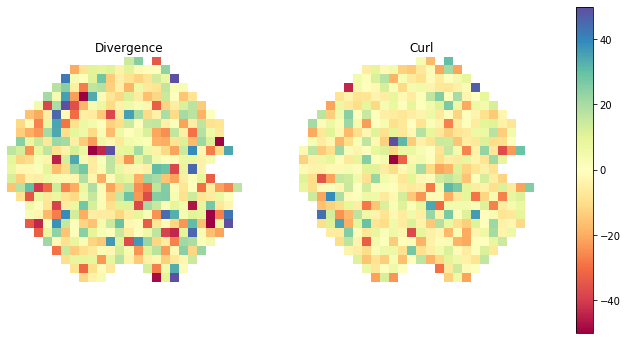

RMS of div: 19.29; curl: 13.32
Mean of first 30 points (Emode (Observed)):  423.76213640680743
Mean of first 30 points (Bmode (Observed)):  12.655304145386447
Mean of first 30 points (Emode (GPR Applied)):  136.6135556542603
Mean of first 30 points (Bmode (GPR Applied)):  1.9640009429068586
Ratio of E modes: 3.10190401221427
Ratio of B modes: 6.44363445500984


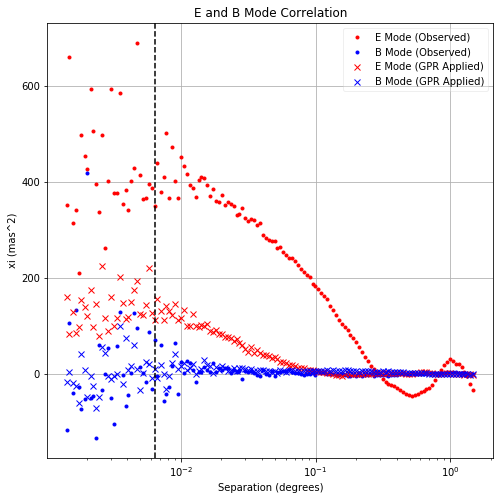

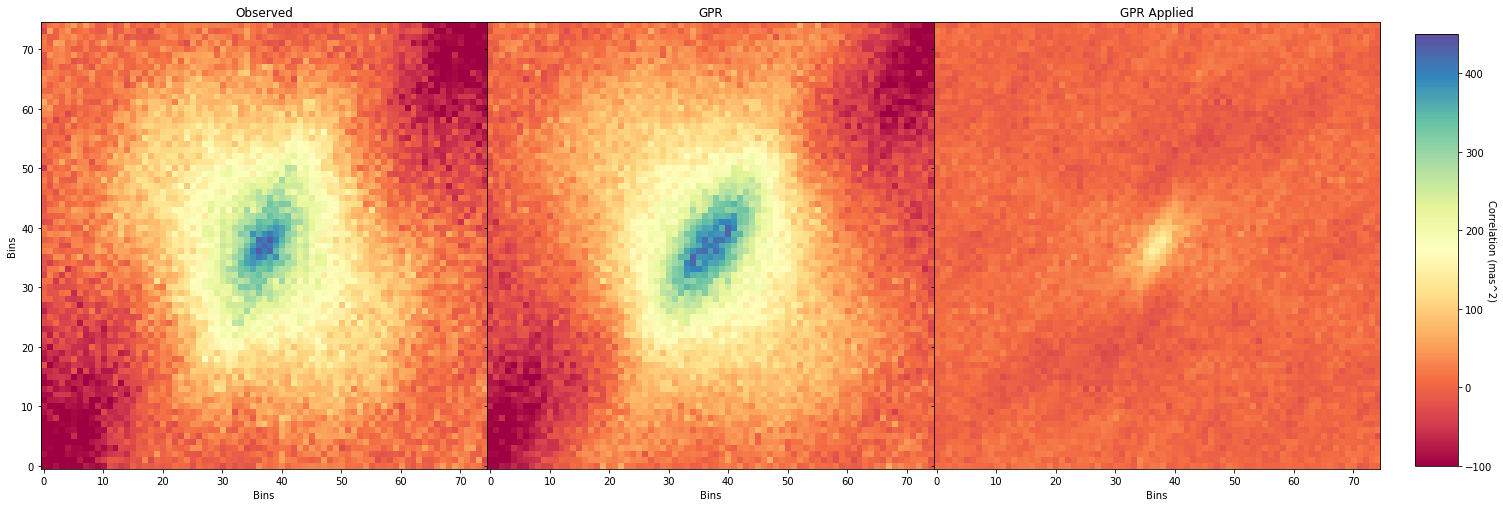

/home/fortino/DESworkspace/cfGPR.py:1055: RuntimeWarning: invalid value encountered in true_divide
  logr = np.histogram(logdr, bins=bins, range=hrange, weights=logdr)[0] / counts
/home/fortino/DESworkspace/cfGPR.py:1060: RuntimeWarning: invalid value encountered in true_divide
  xiplus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:1062: RuntimeWarning: invalid value encountered in true_divide
  xiz2 = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:1071: RuntimeWarning: invalid value encountered in true_divide
  ximinus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts


112.85499845177327 0
113.24326578605478 0
118.18574446720434 0
110.68830154780122 0
113.06606433318684 0
109.29603934164165 0
105.73798034476759 0
108.54336878411264 0
105.33443109932381 0
104.08133910602793 0
102.05107549684114 0
105.70585672005646 0
103.46310757155358 0
106.60631080715017 0
104.26301870808082 0
107.0274277640412 0
102.3012943623597 0
102.71076824285632 0
112.04936520858072 0
103.53958433872661 0
104.247183214911 0
102.66060940583739 0
107.56194854124236 0
102.21552525710004 0
103.38979012529533 0
102.16207137290066 0
101.78327498406847 0
103.36714169762455 0
101.46753060812283 0
102.16688100020075 0
102.76862272861763 0
101.70360616658522 0
101.46868599706822 0
101.60008848368479 0
102.42005706821095 0
101.37976596678064 0
102.06062065764144 0
101.45442682194226 0
101.90645400462739 0
101.26239634153698 0
101.37897394715355 0
101.88977158443217 0
101.33105725124942 0
101.26898166956131 0
101.18859243282594 0
101.18019056434872 0
101.34687726692505 0
101.1951700966427

/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

RMSx, RMSy, noise: 14.549188614028786 12.53943116316691 1.6765169835229434


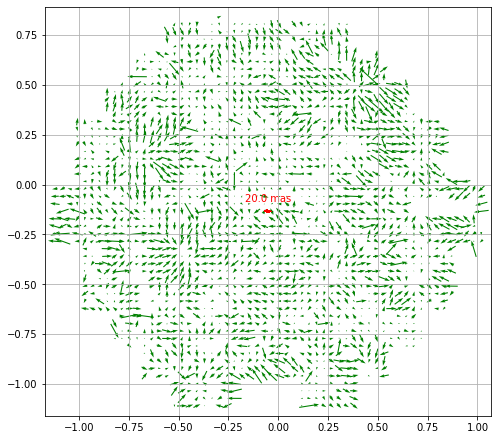

/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

RMSx, RMSy, noise: 9.58185437723493 8.642726249327893 1.6765169835229434


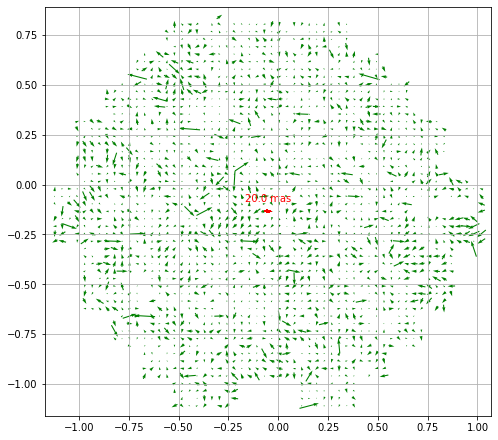

/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

RMSx, RMSy, noise: 14.322472409629261 11.217735905376069 0.6490769226614107


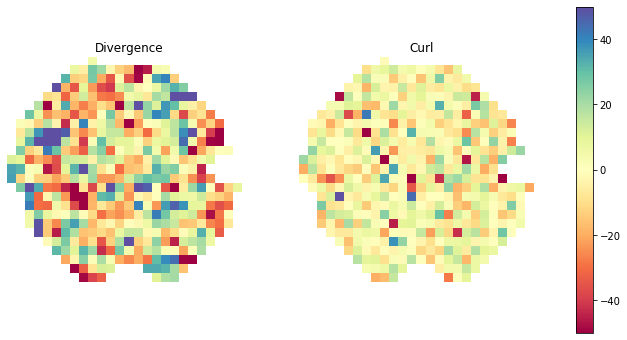

RMS of div: 27.28; curl: 13.87
RMSx, RMSy, noise: 9.59368363839221 7.040994294572584 0.6490769226614107


/home/fortino/DESworkspace/cfGPR.py:982: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:983: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:984: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:985: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:986: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:987: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:995: RuntimeWarning: invalid value encountered in less
  useful = np.logic

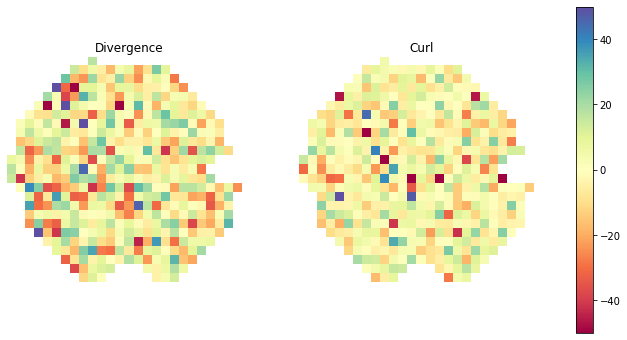

RMS of div: 18.37; curl: 13.42


/home/fortino/DESworkspace/cfGPR.py:1055: RuntimeWarning: invalid value encountered in true_divide
  logr = np.histogram(logdr, bins=bins, range=hrange, weights=logdr)[0] / counts
/home/fortino/DESworkspace/cfGPR.py:1060: RuntimeWarning: invalid value encountered in true_divide
  xiplus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:1062: RuntimeWarning: invalid value encountered in true_divide
  xiz2 = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:1071: RuntimeWarning: invalid value encountered in true_divide
  ximinus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts


Mean of first 30 points (Emode (Observed)):  291.22305091770073
Mean of first 30 points (Bmode (Observed)):  16.425874832200268
Mean of first 30 points (Emode (GPR Applied)):  97.40785938998586
Mean of first 30 points (Bmode (GPR Applied)):  10.85627012809823
Ratio of E modes: 2.9897284751094766
Ratio of B modes: 1.513031145907725


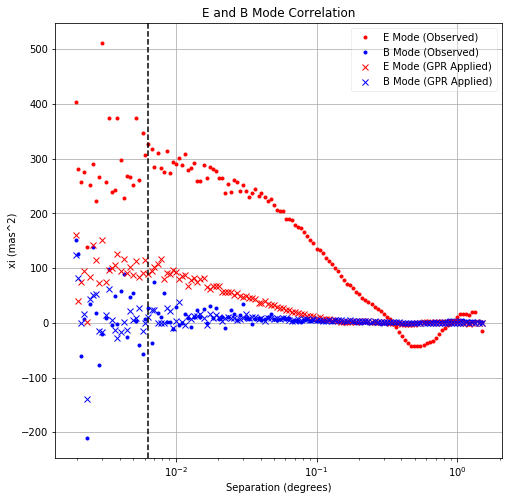

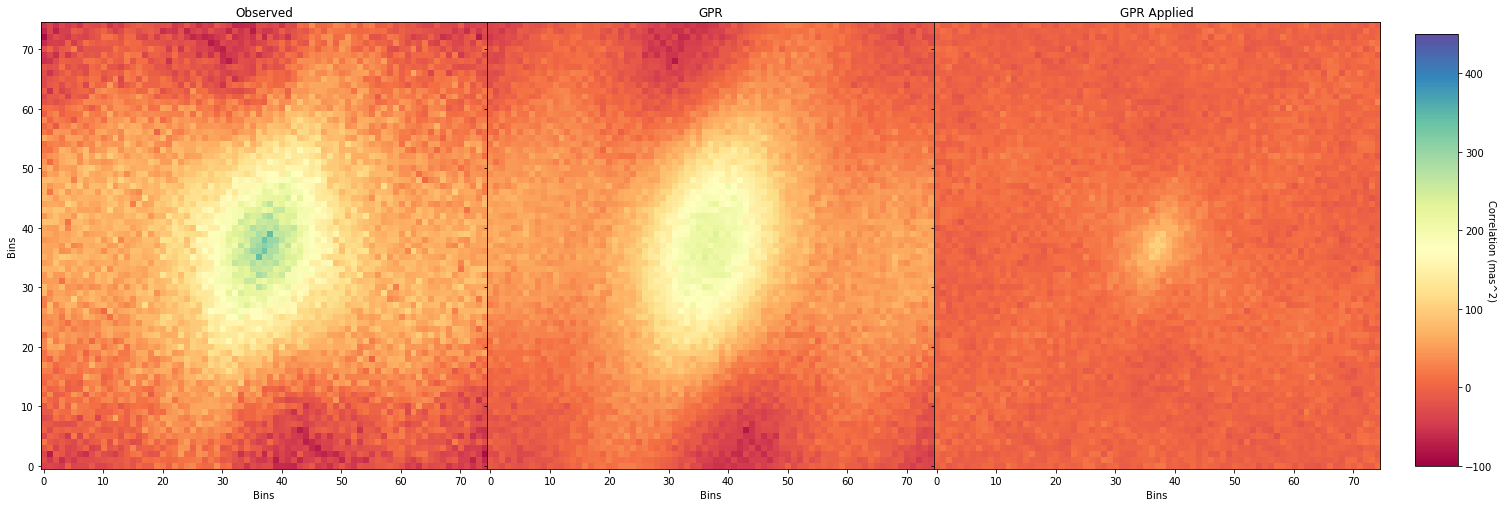

123.29485978877372 0
123.05476277297879 0
126.0040591064346 0
123.9964885383996 0
123.41874056812964 0
123.51642342040233 0
122.28547569305006 0
118.72365986532742 0
122.3930669660076 0
118.88519691400695 0
114.64444430509266 0
116.55005893985052 0
116.48062277987094 0
114.53240860687363 0
123.89453941198819 0
117.02908913113231 0
113.50509269667198 0
145.6447916120388 0
111.22792456412175 0
111.84800403636693 0
112.40192580369803 0
111.90152283331625 0
114.48488597867872 0
115.712429574016 0
115.70380448750603 0
111.49234963350102 0
116.42908193582687 0
112.11211555411639 0
111.05580007413815 0
113.904801898768 0
114.47181818811566 0
112.08151187081648 0
111.77132773515467 0
110.74643002889323 0
112.697984366694 0
113.73793870311664 0
110.81318639771035 0
110.78355149788682 0
110.89162412732979 0
109.87253374157706 0
109.61708434729587 0
111.77040207672064 0
110.28369196489336 0
109.31625032023902 0
109.30469772848107 0
111.29198270763554 0
109.94235792571685 0
110.09423451973407 0
10

In [ ]:
for exposure in exposures:
    GP = cfGPR.CurlFreeGPR(f"../cfexposures/{exposure}", printing=False)
    GP.load_fits('folio2')
    GP.extract_data(exposure)
    GP.sigma_clip()
    GP.split_data(train_size=0.50)

    if (GP.nData < 6000) or (GP.nData > 25000):
        os.system(f"rm -r ../cfexposures/{exposure}")
        continue
    
    GP.correlation_fit()
    GP.optimize()
    GP.fit(GP.theta)
    GP.predict(GP.Xtest)
    GP.get_chisq(GP.Ytest, GP.fbar_s, GP.Etest)
    GP.wrap()